In [1]:
!mkdir ../lookalikeceleb/

mkdir: cannot create directory ‘../lookalikeceleb/’: File exists


In [2]:
import face_recognition
import os
import numpy as np
from IPython.display import Image

In [3]:
def load_images(known_images_dir):
    known_encodings = []
    known_images = []

    for file in os.listdir(known_images_dir):
        #fsdecode function decode the file into filename
        filename = os.fsdecode(file)
        image = face_recognition.load_image_file(os.path.join(known_images_dir, filename))

        enc = face_recognition.face_encodings(image)
        if len(enc) > 0:
            known_encodings.append(enc[0])
            known_images.append(filename)

    return (known_encodings, known_images)

In [4]:
type(load_images)

function

In [5]:
def calculate_face_distance(known_encodings, unknown_img_path, cutoff=0.5, num_results=4):
    image_to_test = face_recognition.load_image_file(unknown_img_path)
    image_to_test_encoding = face_recognition.face_encodings(image_to_test)[0]

    face_distances = face_recognition.face_distance(known_encodings, image_to_test_encoding)
    return (unknown_img_path, known_images[face_distances.argmin()])

In [6]:
known_encodings, known_images = load_images("/cxldata/projects/lookalikeceleb/images")

/usr/local/anaconda/lib/python3.6/site-packages/PIL/Image.py:976: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


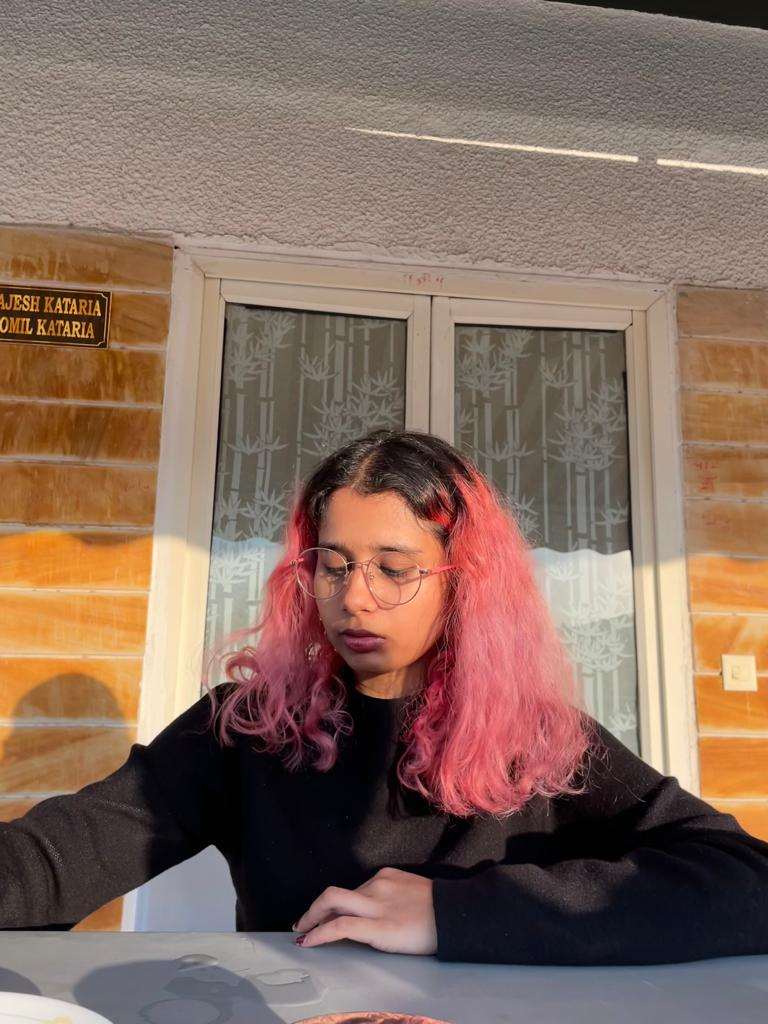

In [7]:
original_image = "../lookalikeceleb/myimage.jpg"
Image(filename=original_image)

In [10]:
matching_image = calculate_face_distance(known_encodings, original_image)[1]

Hey, you look like Sharman Joshi!


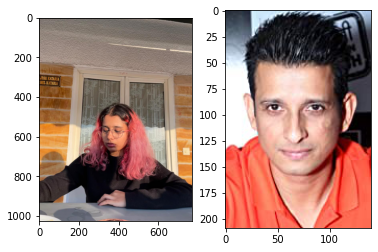

In [11]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib import rcParams

%matplotlib inline

# read images
img_1 = mpimg.imread(original_image)
img_2 = mpimg.imread('/cxldata/projects/lookalikeceleb/images/' + matching_image)

# display images
fig, ax = plt.subplots(1,2)
ax[0].imshow(img_1);
ax[1].imshow(img_2);

print('Hey, you look like ' + os.path.splitext(matching_image)[0] + '!')